In [1]:
import M2_ProposalTools.WorkHorse as WH
import M2_ProposalTools.MakeRMSmap as MRM
import numpy as np
import astropy.units as u
from astropy.io import fits                # To read/write fits


In [2]:
import M2_ProposalTools.ModelFitting as MF

In [3]:
from importlib import reload

In [4]:
outdir="/home/data/MUSTANG2/SimulatedObservations/QuickAndDirty/"

In [5]:
M5_14    = 6.0
M500     = M5_14*1e14*u.M_sun
z        = 0.5
pixsize  = 4.0

times    = [10,10]
ptgs     = [[180,45.0],[180,45.0]]
sizes    = [3.5,3.5]
offsets  = [1.5,0]

In [44]:
FilterHDU,SmoothHDU,SkyHDU = WH.lightweight_simobs_A10(z,M500,conv2uK=True,pixsize=pixsize,ptgs=ptgs,sizes=sizes,times=times,offsets=offsets,Dist=True)

hi


/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/MakeRMSmap.py:591: RuntimeWarning: invalid value encountered in true_divide
  NewImg     = (img1*wtm1 + img2*wtm2)/NewWtm
/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/MakeRMSmap.py:591: RuntimeWarning: invalid value encountered in true_divide
  NewImg     = (img1*wtm1 + img2*wtm2)/NewWtm
/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/MakeRMSmap.py:591: RuntimeWarning: invalid value encountered in true_divide
  NewImg     = (img1*wtm1 + img2*wtm2)/NewWtm
/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/MakeRMSmap.py:591: RuntimeWarning: invalid value encountered in true_divide
  NewImg     = (img1*wtm1 + img2*wtm2)/NewWtm
/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/MakeRMSmap.py:591: RuntimeWarning: invalid value encountered in true_divide
  NewImg     = (img1*wtm1 + img2*wtm2)/NewWtm


In [7]:
pixstr = "{:.1f}".format(pixsize).replace(".","p")
zstr   = "{:.1f}".format(z).replace(".","z")
Mstr   = "{:.1f}".format(M5_14).replace(".","m")
sss    = ["{:.1f}".format(mysz).replace(".","s") for mysz in sizes]
sts    = ["{:.1f}".format(mytime).replace(".","h") for mytime in times]
ssstr  = "_".join(sss)
ststr  = "_".join(sts)
InputStr = "_".join([zstr,Mstr,ssstr,ststr,pixstr])

filename = "SimulatedObs_Unsmoothed_"+InputStr+".fits"
FilterHDU.writeto(outdir+filename,overwrite=True)
filename2 = "SimulatedObs_Smoothed_"+InputStr+".fits"
SmoothHDU.writeto(outdir+filename2,overwrite=True)
filename3 = "SimulatedSky_"+InputStr+".fits"
SkyHDU.writeto(outdir+filename3,overwrite=True)

In [8]:
SkyHDU[0].data *= -3.3e6 # Run once 


In [43]:
WH=reload(WH)
MRM=reload(MRM)
MF=reload(MF)

131.5 131.5
131.5 131.5
131.5 131.5


/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/ModelFitting.py:798: RuntimeWarning: divide by zero encountered in true_divide
  UncPerBin       = 1.0/ np.sqrt( WMy*bmCnt )


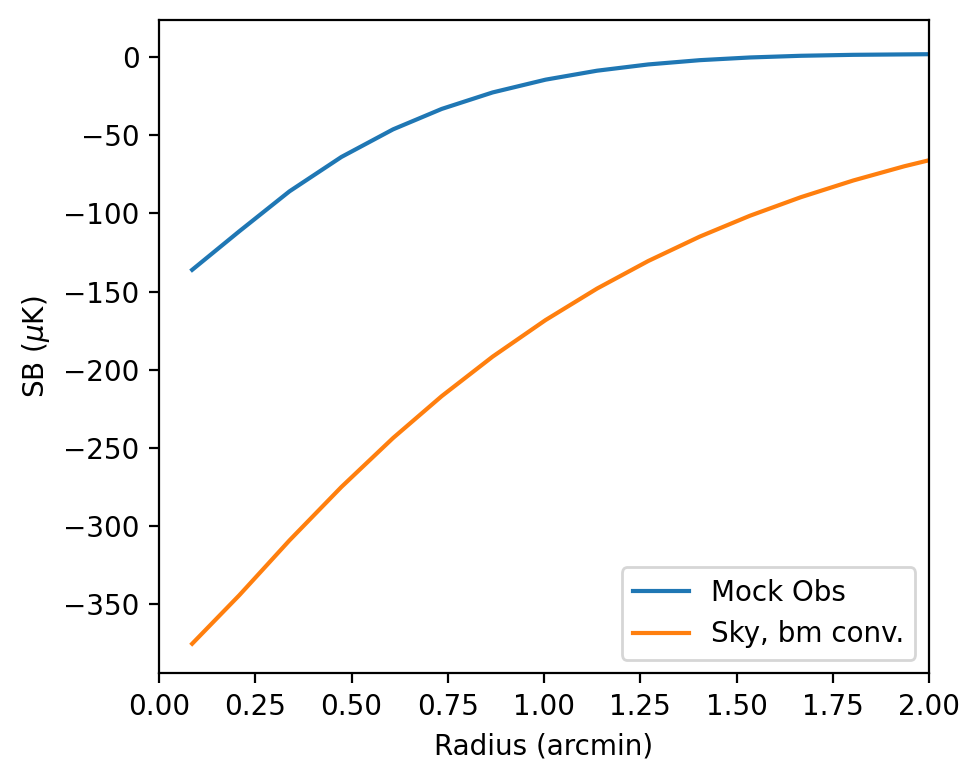

In [10]:
SBfn = "SimulatedObs_SBprofiles_"+InputStr+".png"
MF.plot_SB_profiles(FilterHDU,SkyHDU,outdir,SBfn,solns=None,bv=120.0)

In [11]:
pngname  = "SimulatedObservations_"+InputStr+"_RMSimage.png"
vmin     = 15.0  # uK
vmax     = 420.0 # uK
MRM.plot_rms_general(SmoothHDU,outdir+pngname,ncnts=5,vmin=vmin,vmax=vmax)

/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/MakeRMSmap.py:15: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("tab20b").copy()
  mycmap.set_under('w')
/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/MakeRMSmap.py:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("tab20b").copy()
  mycmap.set_over('w')


144 0 32 113 263.0 15
I already did this


<Figure size 504x360 with 0 Axes>

In [12]:
wtmap = FilterHDU[1].data
print(np.min(wtmap),np.max(wtmap))

0.0 0.004865696816915008


In [13]:
WH=reload(WH)
MRM=reload(MRM)
MF=reload(MF)

[2.42406841e-05 4.93877836e-05 1.00622291e-04 2.05007084e-04
 4.17679859e-04 8.50977740e-04]
Bins start with:  [  5.          10.18696162  20.75483742  42.28574646  86.15265527
 175.52675858]
Bins are now:  [  5.          10.18696162  20.75483742  42.28574646  86.15265527
 175.52675858]


/home/charles/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
  0%|          | 12/10000 [00:09<2:03:07,  1.35it/s]/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/analytic_integrations.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  yint = 1.0 - (rin/rout)**(2-alpha)  # I could leave out the second term...
100%|██████████| 10000/10000 [1:43:56<00:00,  1.60it/s]


###########################################################################
R500 found to be:  0.000805180380881021  radians
M500 found to be:  5.0824861532670464  \pm  0.6841014441031732  1e14 M_sun
P500 found to be:  0.005092489669882063 keV / cm3
Systematic error on M500:  0.03905455795040768  1e14 M_sun
###########################################################################
[[-6.96132415e-06  6.47271285e-07  6.53494414e-07]
 [ 2.87337781e-01  2.09877073e-01  1.55248266e-01]
 [ 3.04892301e-01  1.49895533e-01  1.29084410e-01]
 [ 1.50881789e-01  4.19056568e-02  4.04434033e-02]
 [ 1.00791017e-01  1.78659111e-02  1.60353341e-02]
 [ 4.92271558e-02  7.87973314e-03  7.68015954e-03]
 [ 8.00412964e-04  1.15049491e-03  4.19706044e-04]
 [ 6.20362802e+00  6.24622796e+00  4.78381143e+00]
 [ 5.38611648e+00  5.50790071e+00  4.04035762e+00]]


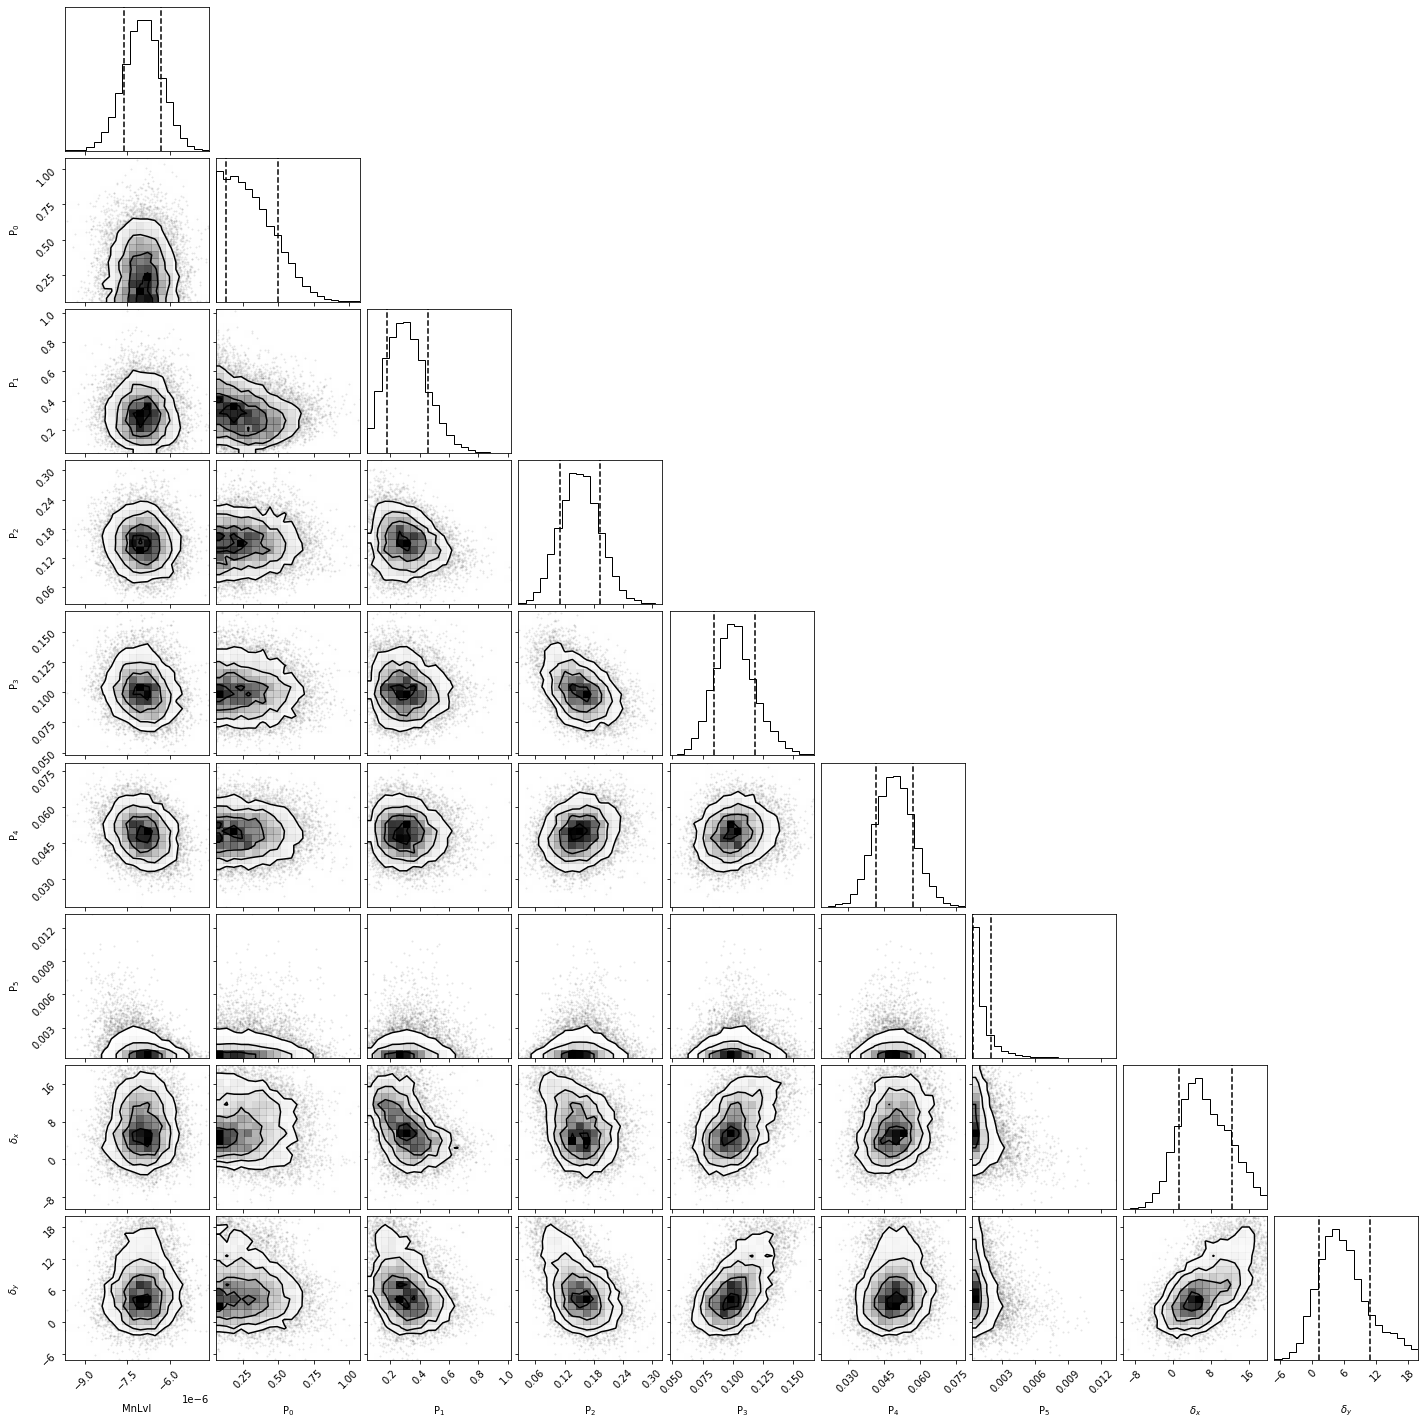

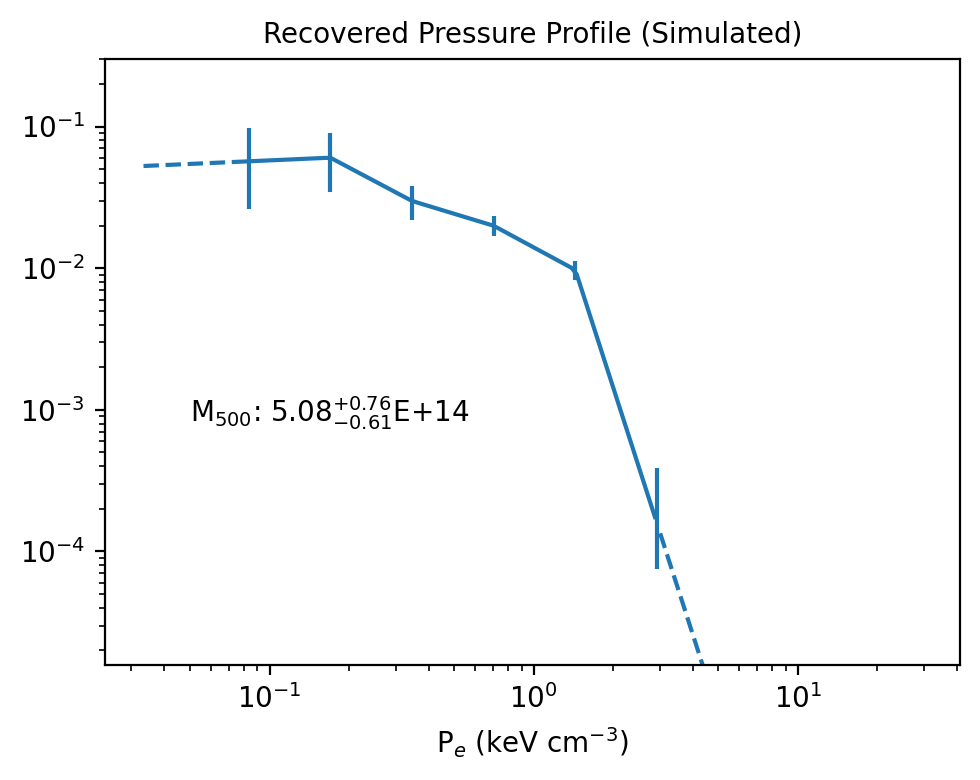

In [14]:
inputHDU = fits.open(outdir+filename)
nsteps   = 10000
nsstr    = "_"+repr(nsteps)+"steps"
outbase = "NP_fit_"+InputStr+nsstr+"_corner.png"
MF.fit_spherical_model(z,M500,inputHDU,outdir=outdir,nsteps=nsteps,outbase=outbase)   # 100 for testing purposes

In [15]:
-0.0011111111111111*3600.0

-3.99999999999996

In [16]:
foo = np.load("/home/data/MUSTANG2/SimulatedObservations/QuickAndDirty/NP_fit_solutions.npy")
print(foo)

[[ 7.76416742e-07  9.42255011e-07  9.57285076e-07]
 [ 2.37276411e-01  2.38127397e-01  1.25489790e-01]
 [ 1.06095833e-01  4.35090506e-02  3.51246847e-02]
 [ 8.28355760e-02  1.89125204e-02  1.99762638e-02]
 [ 3.85241228e-03  2.75456491e-03  2.21655629e-03]
 [-1.79511526e+01  7.23510788e+00  1.63870348e+00]
 [-9.21788519e+00  9.13072206e+00  6.92465701e+00]]


In [17]:
nBins = 15
NPlabels = [rf'''P$_{{{sub}}}$''' for sub in range(nBins)]


In [18]:
print(NPlabels)

['P$_{0}$', 'P$_{1}$', 'P$_{2}$', 'P$_{3}$', 'P$_{4}$', 'P$_{5}$', 'P$_{6}$', 'P$_{7}$', 'P$_{8}$', 'P$_{9}$', 'P$_{10}$', 'P$_{11}$', 'P$_{12}$', 'P$_{13}$', 'P$_{14}$']
